In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
# read in data and perform prelimary data analysis
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# encode target (tumor diagnosis) as malignant=1, benign=0
le = preprocessing.LabelEncoder()
diagnosis = le.fit_transform(df['diagnosis'])
df['diagnosis'] = diagnosis
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# create dataframe copy and drop null values
df1 = df.copy()
df1.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# separate target variables and features
y = df1.diagnosis.copy()
X = df1.drop(['diagnosis'], axis=1)

In [6]:
# split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
#create logit model and fit data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# testing training accuracy and creating baseline training scores
y_train_hat = model.predict(X_train)
y_train_hat_probs = model.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[269   0]
 [157   0]]
Training AUC: 56.2143 %
Training accuracy: 63.1455 %


In [9]:
# comparing predicted values to real outcomes
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head(15)

,True,Prediction
0,0,0
1,1,0
2,0,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,0
9,0,0


In [10]:
# creating function to determine mutual information scores between target
# and features
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# function to visualize mi scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

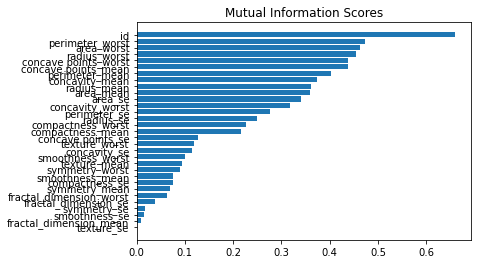

In [11]:
# create + visualize MI scores
mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

In [12]:
mi_scores

id                         0.660316
perimeter_worst            0.473387
area_worst                 0.463288
radius_worst               0.454203
concave points_worst       0.438638
concave points_mean        0.437419
perimeter_mean             0.402936
concavity_mean             0.374637
radius_mean                0.361199
area_mean                  0.359468
area_se                    0.340645
concavity_worst            0.318076
perimeter_se               0.276715
radius_se                  0.248893
compactness_worst          0.226367
compactness_mean           0.216178
concave points_se          0.126672
texture_worst              0.118904
concavity_se               0.114509
smoothness_worst           0.100018
texture_mean               0.094937
symmetry_worst             0.089993
smoothness_mean            0.075880
compactness_se             0.075163
symmetry_mean              0.069241
fractal_dimension_worst    0.062950
fractal_dimension_se       0.038122
symmetry_se                0

In [13]:
#using features with MI > 0.2 (excluding ID)
features = ['perimeter_worst', 'area_worst','radius_worst',
            'concave points_worst','concave points_mean',
            'perimeter_mean','concavity_mean','radius_mean',
            'compactness_worst','compactness_mean']
X = X[features]
X.head()

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,concavity_mean,radius_mean,compactness_worst,compactness_mean
0,184.60,2019.0,25.38,0.2654,0.14710,122.80,0.3001,17.99,0.6656,0.27760
1,158.80,1956.0,24.99,0.1860,0.07017,132.90,0.0869,20.57,0.1866,0.07864
2,152.50,1709.0,23.57,0.2430,0.12790,130.00,0.1974,19.69,0.4245,0.15990
3,98.87,567.7,14.91,0.2575,0.10520,77.58,0.2414,11.42,0.8663,0.28390
4,152.20,1575.0,22.54,0.1625,0.10430,135.10,0.1980,20.29,0.2050,0.13280


In [14]:
# split data with new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [15]:
# re-fit model
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# metrics to show model training improvement
y_train_hat = model.predict(X_train)
y_train_hat_probs = model.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training AUC: %.4f %%' % train_auc_roc)
print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[260   9]
 [ 12 145]]
Training AUC: 98.9889 %
Training accuracy: 95.0704 %


In [33]:
# overall evaluation metrics
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Precision: % .4f %%' % precision)
print('Recall: % .4f %%' % recall)
print('Accuracy: % .4f %%' % accuracy)


Precision:  0.9245 %
Recall:  0.8909 %
Accuracy:  0.9301 %


In [37]:
# side by side comparison of real vs. true outcomes
prediction = pd.Series(model.predict(X_test))
true = y_test.reset_index(drop=True)
z = pd.concat([true, prediction], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,0,1
1,1,1
2,0,0
3,1,1
4,1,0


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32